In [27]:
"""
Linear Discriminant Analysis 
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

## Importing the Dataset

dataset = pd.read_csv(r'C:\Users\pulkit.goel\Desktop\Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:,13].values


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

# Feature Scalar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



In [28]:
# Applying the Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components= 2)
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

X_train.shape
X_test.shape

(18, 2)

In [29]:
### Here We have used y_train as well as this is supervised learning

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)


y_pred = classifier.predict(X_test)
y_pred.shape

C:\Users\pulkit.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pulkit.goel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(18,)

In [39]:
%matplotlib inline

def plot_confusion_matrix(cm,title='confusion Matrix', cmap='Pastel1'):
    plt.figure(figsize = (9,9))
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title,size =15)
    plt.colorbar()
    tick_marks = np.arange(3)
    plt.xticks(tick_marks,["0","1","2"],rotation=45,size=3)
    plt.yticks(tick_marks,["0","1","2"],size=3)
    plt.tight_layout()
    plt.ylabel('Actual Label',size =15)
    plt.xlabel('Predicted Label', size=15)
    width,height = cm.shape
    
    
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy = (y,x),
                        horizontalalignment='center',
                         verticalalignment = 'center')

Confusion Matrix
[[6 0 0]
 [0 7 0]
 [0 0 5]]


<Figure size 432x288 with 0 Axes>

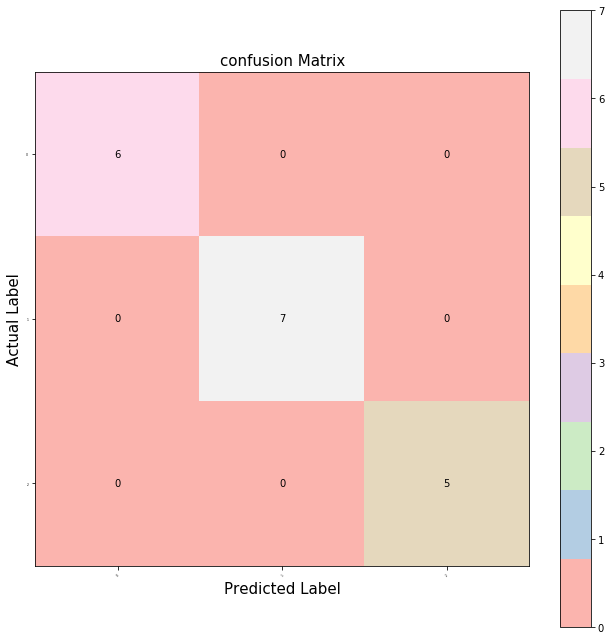

In [40]:
# plotting the Confusion Matrix
confusion = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(confusion)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


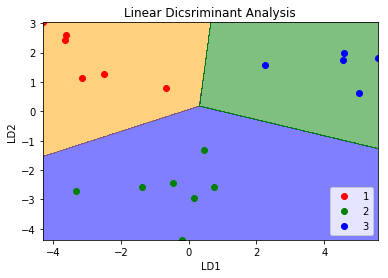

In [46]:
# Visulaizing the Results
from matplotlib.colors import ListedColormap
X_set,y_set = X_test,y_test

aranged_pic1 = np.arange(start= X_set[:,0].min(), stop=X_set[:,0].max(), step=0.01)
aranged_pic2 = np.arange(start= X_set[:,1].min(), stop=X_set[:,1].max(), step=0.01)

X1,X2 = np.meshgrid(aranged_pic1, aranged_pic2)
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.5, cmap= ListedColormap(('orange','blue','green')))




plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
               c = ListedColormap(('red','green','blue'))(i),label = j
               )
plt.title('Linear Dicsriminant Analysis')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


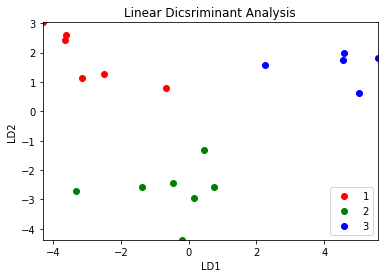